In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras
from keras.models import Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import itertools
import os
import shutil
import random
import glob

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
######RENDERING IN GPU######
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# tf.test.is_built_with_cuda()

# gpu_devices = tf.config.experimental.list_physical_devices('CPU')
# tf.config.experimental.set_memory_growth(gpu_devices[0], True)
# print("Num of GPUs avaliable: ", len(gpu_devices))
# print(gpu_devices)


######RENDERING IN CPU######
# from tensorflow.python.client import device_lib
# def get_available_devices():
#     local_device_protos = device_lib.list_local_devices()
#     return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']


######RENDERING SIMULTANEOUSLY######
# with tf.device("gpu:0"):
#    print("tf.keras code in this scope will run on GPU")

# with tf.device("cpu:0"):
#    print("tf.keras code in this scope will run on CPU")

In [3]:
#Confusion Matrix class form scikit-learn documentation
#https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
######CLASSIFICATION AND AUGMENTATION######
########skip if already done########

# os.makedirs('dataset/processed/train/normal')
# os.makedirs('dataset/processed/train/rusted')
# os.makedirs('dataset/processed/test/normal')
# os.makedirs('dataset/processed/test/rusted')
# os.makedirs('dataset/processed/valid/normal')
# os.makedirs('dataset/processed/valid/rusted')

# for i in random.sample(glob.glob('dataset/raw/n*'),20):
#     shutil.copy(i, 'dataset/processed/train/normal')
# for i in random.sample(glob.glob('dataset/raw/r*'),20):
#     shutil.copy(i, 'dataset/processed/train/rusted')
# for i in random.sample(glob.glob('dataset/raw/n*'),5):
#     shutil.copy(i, 'dataset/processed/test/normal')
# for i in random.sample(glob.glob('dataset/raw/r*'),5):
#     shutil.copy(i, 'dataset/processed/test/rusted')
# for i in random.sample(glob.glob('dataset/raw/n*'),5):
#     shutil.copy(i, 'dataset/processed/valid/normal')
# for i in random.sample(glob.glob('dataset/raw/r*'),5):
#     shutil.copy(i, 'dataset/processed/valid/rusted')

In [5]:
# augmentation = ImageDataGenerator(rotation_range = 50, width_shift_range = 0.5, 
#                                  height_shift_range = 0.5, shear_range = 0.5, zoom_range = 0.3,
#                                  channel_shift_range = 10., horizontal_flip = True)

# os.makedirs('dataset/augmented/train/normal')
# os.makedirs('dataset/augmented/train/rusted')
# os.makedirs('dataset/augmented/test/normal')
# os.makedirs('dataset/augmented/test/rusted')
# os.makedirs('dataset/augmented/valid/normal')
# os.makedirs('dataset/augmented/valid/rusted')

# normal_images = os.listdir('dataset/processed/train/normal/')
# for i in normal_images:
#     image_path = 'dataset/processed/train/normal/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/train/normal/', save_prefix='normal', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

# normal_images = os.listdir('dataset/processed/valid/normal/')
# for i in normal_images:
#     image_path = 'dataset/processed/valid/normal/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/valid/normal/', save_prefix='normal', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
    
# normal_images = os.listdir('dataset/processed/test/normal/')
# for i in normal_images:
#     image_path = 'dataset/processed/test/normal/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/test/normal/', save_prefix='normal', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

# rusted_images = os.listdir('dataset/processed/train/rusted/')
# for i in rusted_images:
#     image_path = 'dataset/processed/train/rusted/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/train/rusted/', save_prefix='rusted', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

# rusted_images = os.listdir('dataset/processed/valid/rusted/')
# for i in rusted_images:
#     image_path = 'dataset/processed/valid/rusted/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/valid/rusted/', save_prefix='rusted', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
    
# rusted_images = os.listdir('dataset/processed/test/rusted/')
# for i in rusted_images:
#     image_path = 'dataset/processed/test/rusted/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/test/rusted/', save_prefix='rusted', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [6]:
traindir = 'dataset/train'
valdir = 'dataset/val'
testdir = 'dataset/test'

In [7]:
########   MOBILENET   ########

train = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=traindir, target_size=(224,224), classes=['fire', 'nofire'], batch_size = 10)
val = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valdir, target_size=(224,224), classes=['fire', 'nofire'], batch_size = 10)
test = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=testdir, target_size=(224,224), classes=['fire', 'nofire'], batch_size = 10, shuffle = False)

Found 1320 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

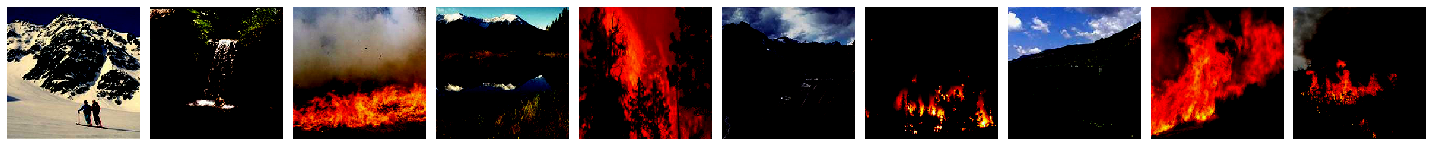

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [8]:
sample_images, sample_labels = next(train)

def displayImages(images):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img, interpolation='none')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

displayImages(sample_images)
print(sample_labels)

In [9]:
from tensorflow.keras.layers import Input
mobilenet_model = Sequential()

pretrained_model= tf.keras.applications.mobilenet.MobileNet(include_top=False,
                   input_tensor=Input(shape=(224, 224, 3)),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

mobilenet_model.add(pretrained_model)
# mobilenet_model.add(Flatten())
mobilenet_model.add(Dense(2, activation='softmax'))

mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 2)                 2050      
                                                                 
Total params: 3,230,914
Trainable params: 2,050
Non-trainable params: 3,228,864
_________________________________________________________________


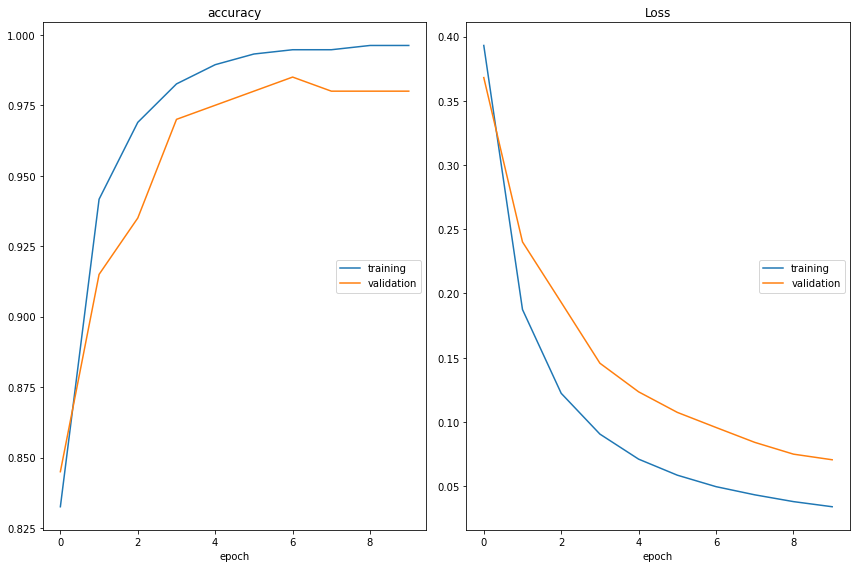

accuracy
	training         	 (min:    0.833, max:    0.996, cur:    0.996)
	validation       	 (min:    0.845, max:    0.985, cur:    0.980)
Loss
	training         	 (min:    0.034, max:    0.393, cur:    0.034)
	validation       	 (min:    0.071, max:    0.368, cur:    0.071)
132/132 [==============================] - 13s 102ms/step - loss: 0.0340 - accuracy: 0.9962 - val_loss: 0.0706 - val_accuracy: 0.9800


In [10]:
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.fit(x=train, validation_data=val, epochs=10, callbacks=[PlotLossesKeras()], verbose=1)

In [11]:
import os.path
mobilenet_model.save('forestfire_model.h5')

In [12]:
mobilenet_predict = mobilenet_model.predict(x=test, verbose=0)
mobilenet_acc = accuracy_score(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
mobilenet_rec = recall_score(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
mobilenet_pre = precision_score(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
mobilenet_f1 = f1_score(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
print("Accuracy: " , mobilenet_acc , "| Recall: " , mobilenet_rec , "| Precision: " , mobilenet_pre , "| F1 score: " , mobilenet_f1)

Accuracy:  0.9631578947368421 | Recall:  0.968421052631579 | Precision:  0.9583333333333334 | F1 score:  0.9633507853403142


Confusion matrix, without normalization
[[182   8]
 [  6 184]]


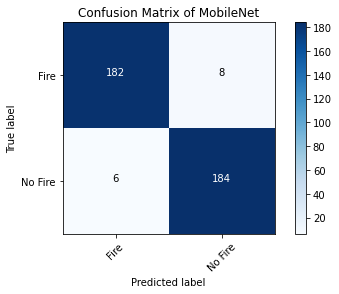

In [13]:
mobilenet_conf = confusion_matrix(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
mobilenet_conf_labels = ['Fire', 'No Fire']
plot_confusion_matrix(cm=mobilenet_conf, classes=mobilenet_conf_labels, title='Confusion Matrix of MobileNet')